##  Using yfinance to Extract Stock Data

In [7]:
import yfinance as yf
import pandas as pd

In [63]:
tesla=yf.Ticker("TSLA")

yfinance is the REST API library that contains Ticker() method for extracting data, TSLA means that Tesla stock

In [64]:
tesla_info=tesla.info

tesla_info returns that dict

In [77]:
tesla_share_price_data=tesla.history(period="max")

A share is the single smallest part of a company's stock that you can buy, the prices of these shares fluctuate over time. Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [78]:
tesla_share_price_data.reset_index(inplace=True)

The reason that we used reset_index() method is transform the Date index to the Date column.

In [79]:
tesla_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


#### Comparison of the Low and High Prices 

<AxesSubplot:xlabel='Date'>

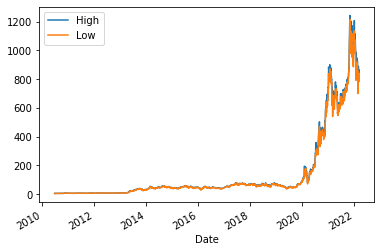

In [80]:
tesla_share_price_data.plot(x="Date",y=["High","Low"])

##  Using Webscraping to Extract Tesla Revenue Data

In [12]:
import requests
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [13]:
url="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
html_data=requests.get(url).text

In [14]:
soup_tesla=BeautifulSoup(html_data,"html5lib")

In [15]:
tesla_html= pd.read_html(url)

In [16]:
tesla_revenue=tesla_html[1]

In [17]:
tesla_revenue=tesla_revenue.rename(columns={"Tesla Quarterly Revenue(Millions of US $)":"Date","Tesla Quarterly Revenue(Millions of US $).1":"Revenue"})

In [18]:
tesla_revenue.isna().sum()

Date       0
Revenue    1
dtype: int64

In [19]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [20]:
tesla_revenue["Date"]=pd.to_datetime(tesla_revenue["Date"])

In [21]:
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]
tesla_revenue=tesla_revenue.reset_index(drop=True)

In [24]:
tesla_revenue.isna().any()

Date       False
Revenue    False
dtype: bool

In [22]:
tesla_revenue.tail()

,Date,Revenue
45,2010-09-30,31
46,2010-06-30,28
47,2010-03-31,21
48,2009-09-30,46
49,2009-06-30,27


##  Using yfinance to Extract Stock Data

In [44]:
gamestop=yf.Ticker("GME")

In [82]:
gme_share_price_data=gamestop.history(period="max")

In [83]:
gme_share_price_data.reset_index(inplace=True)
gme_share_price_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480513,6.773399,6.413183,6.766665,19054000,0.0,0.0
1,2002-02-14,6.850829,6.864295,6.682504,6.733002,2755400,0.0,0.0
2,2002-02-15,6.733000,6.749832,6.632005,6.699335,2097400,0.0,0.0
3,2002-02-19,6.665672,6.665672,6.312190,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463681,6.648838,6.413183,6.648838,1723200,0.0,0.0


##  Using Webscraping to Extract GME Revenue Data

In [27]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data=requests.get(url).text

In [28]:
soup_gme=BeautifulSoup(html_data,"html5lib")

In [29]:
gme_html=pd.read_html(url)

In [30]:
gme_revenue=gme_html[1]

In [31]:
gme_revenue=gme_revenue.rename(columns={"GameStop Quarterly Revenue(Millions of US $)":"Date","GameStop Quarterly Revenue(Millions of US $).1":"Revenue"})

In [32]:
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"")

In [71]:
gme_revenue["Date"] =pd.to_datetime(gme_revenue["Date"])
gme_revenue["Revenue"]=pd.to_numeric(gme_revenue["Revenue"])

In [72]:
gme_revenue.isna().sum()

Date       0
Revenue    0
dtype: int64

In [73]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


#### Comparison of the Low and High Prices 

<AxesSubplot:xlabel='Date'>

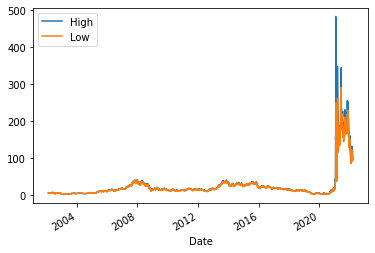

In [84]:
gme_share_price_data.plot(x="Date",y=["High","Low"])

## Define Graph

In [48]:
def make_graph(stock_data, revenue_data, stock):
    
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

##  Plot Tesla Stock Graph

In [40]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

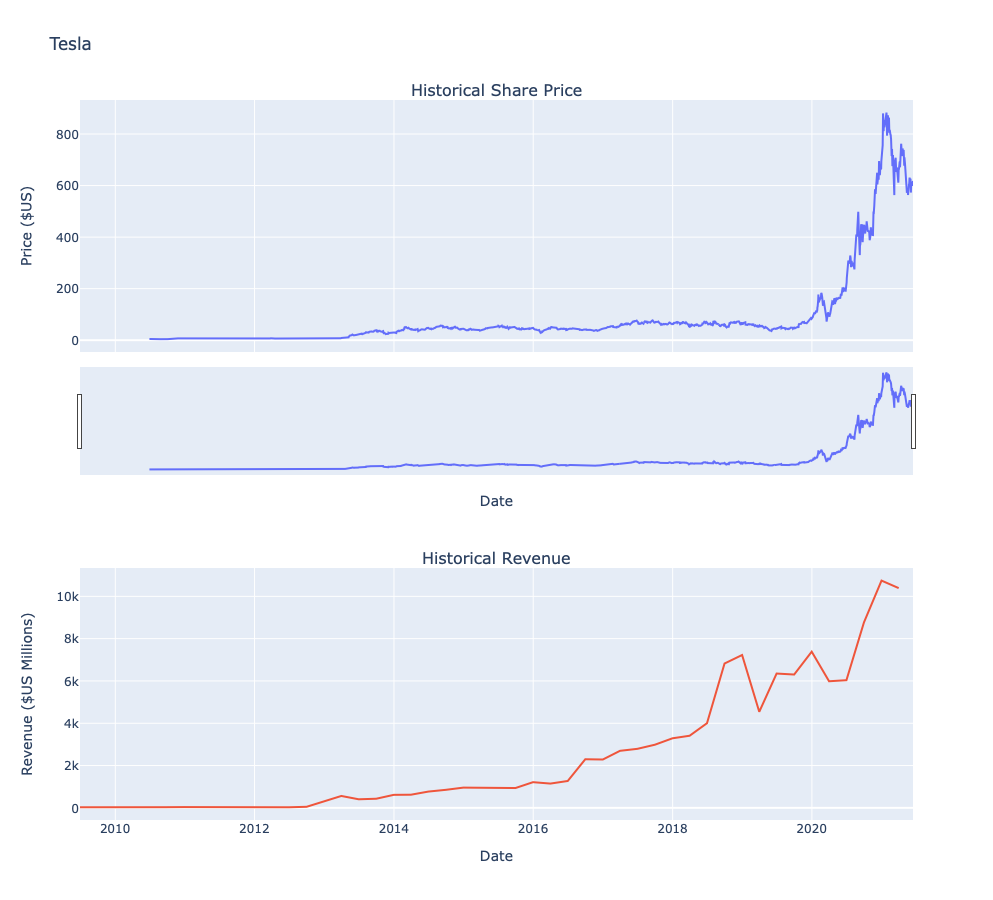

In [81]:
make_graph(tesla_share_price_data, tesla_revenue,"Tesla")

##  Plot Tesla Stock Graph

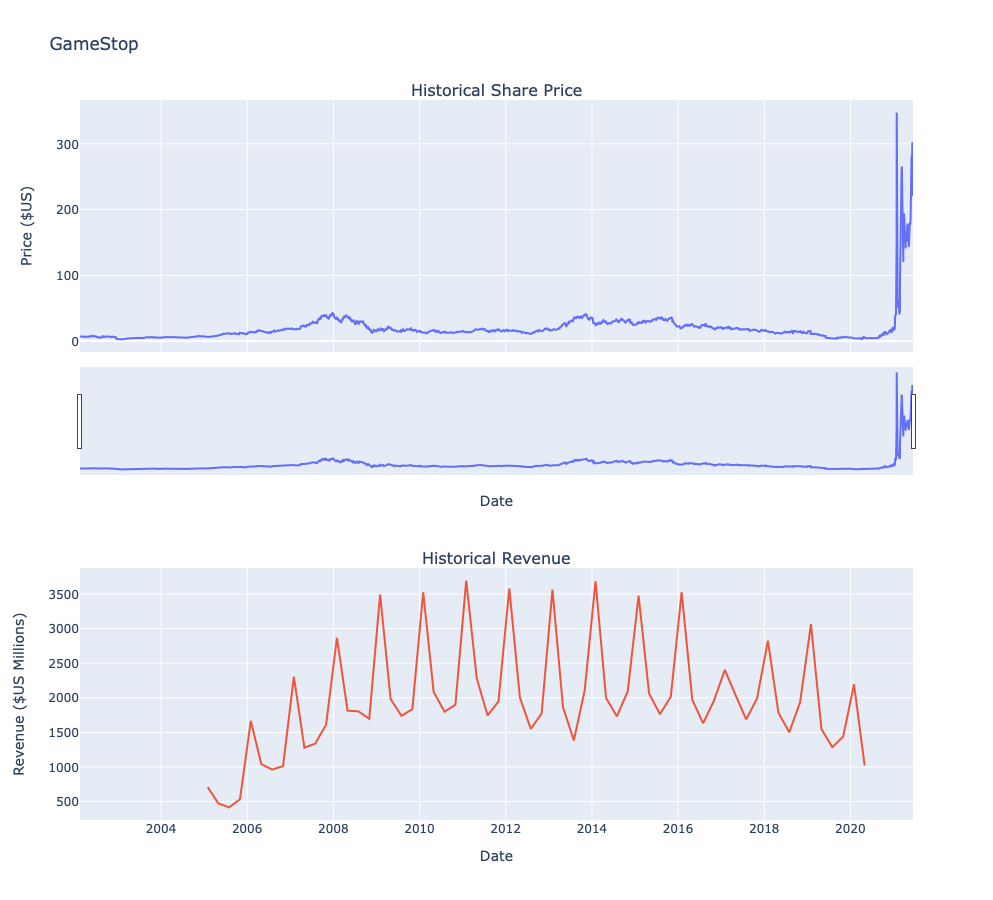

In [85]:
make_graph(gme_share_price_data, gme_revenue,"GameStop")